### Trabajo Práctico N.2: Aritmética de pixels

In [10]:
#Primero importamos las librerias necesarias.

import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Se definen las funciones que luego se utilizaran para transformar entre RGB-YIQ.

M_YIQ = np.array([[0.299, 0.587, 0.114],[0.595716, -0.274453, -0.321263],[0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],[1, -0.2721, -0.6474],[1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

(600, 900, 3)
(600, 900, 3)


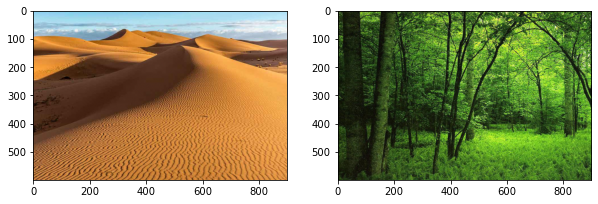

In [43]:
#Luego se suben las 2 imagenes que vamos a utilizar, se normalizan 
#y se recorta la 2da imagen para que tenga el mismo tamaño que la 1ra.
img_1 = imageio.imread('desierto.jpg')/255
img_2 = imageio.imread('bosque.jpg')[16:616,22:922,:]/255

#graficos
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

print(img_1.shape) #tamaño de la imagen 1
print(img_2.shape) #tamaño de la imagen 2

Text(0.5, 1.0, 'Imagen RGB resta clampeada')

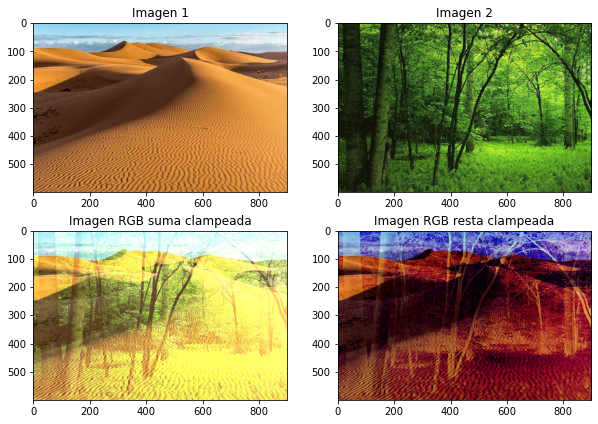

In [42]:
#SUMA Y DIFERENCIA CLAMPEADA (RGB)
#Aqui podemos ver que para la suma se obtienen pixeles más cercanos a 1 y que para la resta todo lo contrario,
#por lo que mostrará zonas más tirando a negro.

img_3_sum = img_1 + img_2
img_3_sum = np.clip(img_3_sum, 0 , 1)

img_3_res = img_1 - img_2
img_3_res = np.clip(img_3_res, 0 , 1)

#graficos
fig, axes = plt.subplots(2, 2, figsize=(10,7))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(img_3_sum)
axes[1,0].set_title('Imagen RGB suma clampeada')
axes[1,1].imshow(img_3_res)
axes[1,1].set_title('Imagen RGB resta clampeada')

Text(0.5, 1.0, 'Imagen RGB resta promediada')

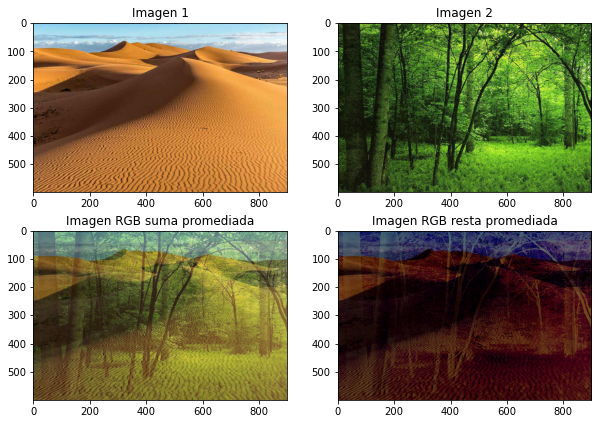

In [52]:
#SUMA Y DIFERENCIA PROMEDIADA (RGB)
#Usando el promedio se veera que las imagenes quedan un poco más oscuras,
#ya que habrá varios pixeles por encima del promedio que disminuiran.

img_3_sum = (img_1 + img_2)/2
img_3_sum = np.clip(img_3_sum, 0 , 1)

img_3_res = (img_1 - img_2)/2
img_3_res = np.clip(img_3_res, 0 , 1)

#graficos
fig, axes = plt.subplots(2, 2, figsize=(10,7))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(img_3_sum)
axes[1,0].set_title('Imagen RGB suma promediada')
axes[1,1].imshow(img_3_res)
axes[1,1].set_title('Imagen RGB resta promediada')

Text(0.5, 1.0, 'Imagen resta clampeada en YIQ y pasada a RGB')

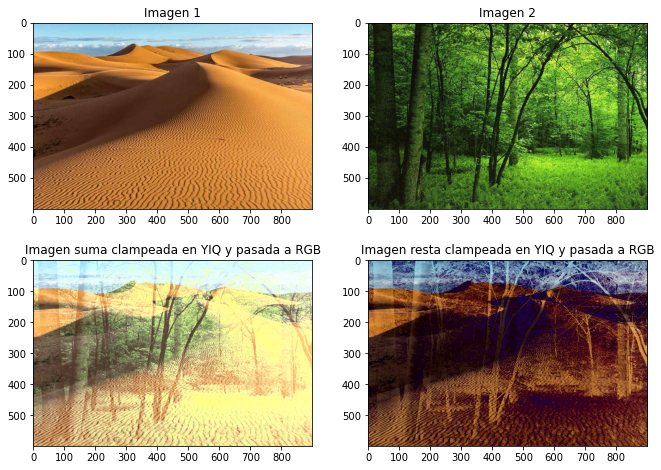

In [53]:
#SUMA Y DIFERENCIA (YIQ)
#Al trabajar en YIQ la imagen suma o resta resultante adopta el valor de mayor peso en Y entre cada imagen, 
#por lo tanto el I y Q tendran una interpolación en base a ese valor.

#Se puede ver en la suma resultante por ejemplo que los pixeles que predominan corresponden con las zonas donde la 
#luminicencia es alta,por lo que alli tendra más ponderancia los valores IQ de la foto que corresponda.

img_1_yiq = rgb2yiq(img_1) #pasaje de RGB a YIQ y separación por canales
img_1_y = img_1_yiq[:,:,0]
img_1_i = img_1_yiq[:,:,1]
img_1_q = img_1_yiq[:,:,2]

img_2_yiq = rgb2yiq(img_2)
img_2_y = img_2_yiq[:,:,0]
img_2_i = img_2_yiq[:,:,1]
img_2_q = img_2_yiq[:,:,2]

#Suma clampeada (canal Y)
img_3_yiq_y_sum = np.clip(img_1_y + img_2_y,0,1)

#Suma Interpolada (canales I,Q)
img_3_yiq_i_sum = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y)
img_3_yiq_q_sum = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)

img_3_yiq_sum = np.zeros(img_1.shape) #defino la imagen 3 y le asigno los valores a cada canal
img_3_yiq_sum[:,:,0] = img_3_yiq_y_sum
img_3_yiq_sum[:,:,1] = img_3_yiq_i_sum
img_3_yiq_sum[:,:,2] = img_3_yiq_q_sum

img_3_rgb_sum = yiq2rgb(img_3_yiq_sum)

#Resta clampeada (canal Y)
img_3_yiq_y_res = np.clip(img_1_y - img_2_y,0,1)

#Resta Interpolada (canales I,Q)
img_3_yiq_i_res = (img_1_y * img_1_i - img_2_y * img_2_i) / (img_1_y + img_2_y)
img_3_yiq_q_res = (img_1_y * img_1_q - img_2_y * img_2_q) / (img_1_y + img_2_y)

img_3_yiq_res = np.zeros(img_1.shape) #defino la imagen 3 y le asigno los valores a cada canal
img_3_yiq_res[:,:,0] = img_3_yiq_y_res
img_3_yiq_res[:,:,1] = img_3_yiq_i_res
img_3_yiq_res[:,:,2] = img_3_yiq_q_res

img_3_rgb_res = yiq2rgb(img_3_yiq_res) #pasaje de YIQ a RGB

#graficos
fig, axes = plt.subplots(2, 2, figsize=(11,8))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Imagen 1')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Imagen 2')
axes[1,0].imshow(np.clip(img_3_rgb_sum,0,1))
axes[1,0].set_title('Imagen suma clampeada en YIQ y pasada a RGB')
axes[1,1].imshow(np.clip(img_3_rgb_res,0,1))
axes[1,1].set_title('Imagen resta clampeada en YIQ y pasada a RGB')



Text(0.5, 1.0, 'Imagen If Darker')

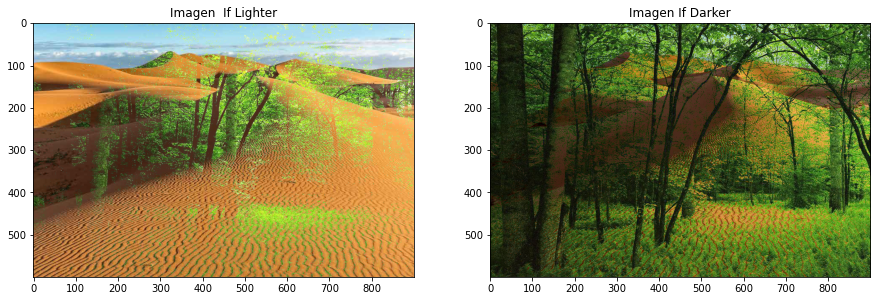

In [49]:
#IF-LIGHTER / IF-DARKER
#If lighter es un método que compara los pixeles de las imagenes y se queda con el mayor (el más luminoso) para asigarlo a la nueva imagen.
#If darker por el contrario asigna a la nueva imagen el pixel de menor valor luego de la comparación.
#Por lo tanto con el primer método en la nueva imagen predomina el desierto (valores mayores) 
#y en la segunda el bosque (colores más oscuros, valores menores)

def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
  
    mask = img_1_y > img_2_y
    img_3[mask] = img_1[mask]
    mask = img_2_y >= img_1_y
    img_3[mask] = img_2[mask]
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)

    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask] 
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]  
    return img_3


img_3 = if_lighter(img_1,img_2)
img_3_darker = if_darker(img_1,img_2)
#graficos
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_3)
axes[0].set_title('Imagen  If Lighter')
axes[1].imshow(img_3_darker)
axes[1].set_title('Imagen If Darker')

Text(0.5, 1.0, 'Imagen If Darker')

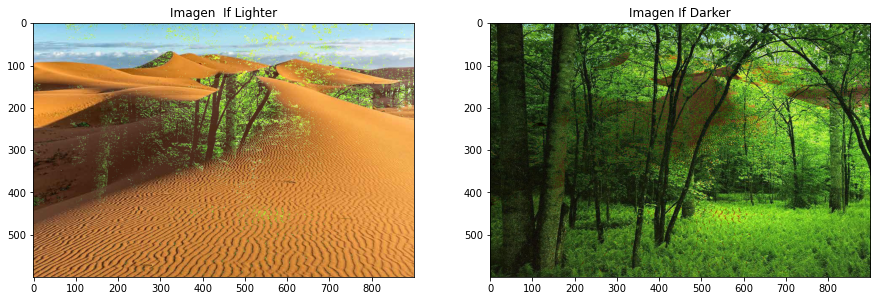

In [50]:
#IF-LIGHTER / IF-DARKER con ciclo for, de modo que recorro las filas y columnas de una imagen
#y voy comparando si el valor es mayor o menor para asignarle a la nueva imagen el corresponiente según el método elegido.
#Aquí tengo una pequeña diferencia en las fotos resultantes si lo comparo con el método programado anteriormente.
#De todos modos se puede apreciar que los métodos son opuestos.

def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    for i in range(len(img_1[:,0,0])):
        for j in range(len(img_1[0,:,0])):
            if img_1[i,j,0] > img_2[i,j,0]:
                img_3[i,j,0] = img_1[i,j,0]
                img_3[i,j,1] = img_1[i,j,1]
                img_3[i,j,2] = img_1[i,j,2]
            else:
                img_3[i,j,0] = img_2[i,j,0]
                img_3[i,j,1] = img_2[i,j,1]
                img_3[i,j,2] = img_2[i,j,2]
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)

    for i in range(len(img_1[:,0,0])):
        for j in range(len(img_1[0,:,0])):
            if img_1[i,j,0] < img_2[i,j,0]:
                img_3[i,j,0] = img_1[i,j,0]
                img_3[i,j,1] = img_1[i,j,1]
                img_3[i,j,2] = img_1[i,j,2]
            else:
                img_3[i,j,0] = img_2[i,j,0]
                img_3[i,j,1] = img_2[i,j,1]
                img_3[i,j,2] = img_2[i,j,2]
    return img_3

img_3 = if_lighter(img_1,img_2)
img_3_darker = if_darker(img_1,img_2)
#graficos
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_3)
axes[0].set_title('Imagen  If Lighter')
axes[1].imshow(img_3_darker)
axes[1].set_title('Imagen If Darker')